# I- Data Pre-processing
Exploration and cleaning of the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
%matplotlib inline

In [2]:
Quora_data = pd.read_csv("train.csv")

In [3]:
Quora_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
qid              1306122 non-null object
question_text    1306122 non-null object
target           1306122 non-null int64
dtypes: int64(1), object(2)
memory usage: 29.9+ MB


In [4]:
Quora_data.isnull().sum()

qid              0
question_text    0
target           0
dtype: int64

In [5]:
Quora_data.head(4)

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0


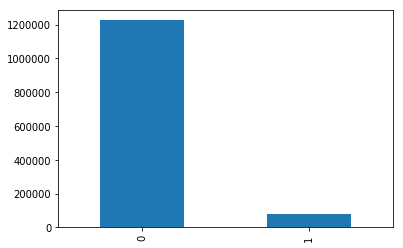

In [6]:
Quora_data.target.value_counts().plot(kind="bar")

In [7]:
Quora_data["target"].value_counts()

0    1225312
1      80810
Name: target, dtype: int64

## I-1 Data Sample and Creating a banlanced sample

In [8]:
sincireData = Quora_data[Quora_data.target==0].sample(n=Quora_data[Quora_data.target==1].shape[0],random_state=42)
sincireData.shape

(80810, 3)

In [9]:
balancedData = [sincireData,Quora_data[Quora_data.target==1]]
balancedData = pd.concat(balancedData)
balancedData.shape[0]

161620

In [10]:
balancedData = balancedData.sample(n=balancedData.shape[0])
Data = balancedData.sample(frac=0.05,random_state=10)
Data

,qid,question_text,target
783947,999431f45a47806d6d6e,What diskusi content when hang out with beast ...,0
1192125,e9a139ae2b6a2342d5fc,When will Indian Muslims accept that Narendra ...,1
138879,1b3025010c3983a5cfb6,Why Chinese hate Japanese so much even though ...,1
294553,39accab8fa5d03767a8a,Why do Belgians seem more vocal in their anti-...,1
708954,8accafc0aa359631ff06,Should I invite myself to hang out?,0
119860,177789bfbe629f4b5d5c,Is Cow Protection Terrorism Increasing in Indi...,1
572154,701ed18444773eb7b6ba,How come great statesman Obama could not get K...,1
914714,b33c00f7843cb8a8a4fe,"In the UK, most people are broke. Is this the ...",1
891017,ae8ff4c6f8ae06f73da8,Why Americans are dumb?,1
165711,20615cbcf1dcf7f8bea4,What does it mean when my friends dream about ...,0


In [11]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(Data,test_size=0.2,random_state=21)

## I-2 Tokonizing and Cleanning the data

In [12]:
#!pip install spacy
#!python -m spacy download en_core_web_sm

In [13]:
import nltk
import spacy
import en_core_web_sm
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
import string


In [14]:
# Loading the English Tokenizer
en_nlp = spacy.load("en_core_web_sm")
# Parser load the Parser
parser = English()
#list of Stop word
stop_word = spacy.lang.en.stop_words.STOP_WORDS
#List of Ponctuation marks
punctuations = string.punctuation

def spacy_tokenizer(question):
    tokens = parser(question)
    
    #lemmanizing each token and converting to lowercase
    tokens = [word.lemma_.lower().strip() if(word.lemma_!="-PRON-") else word.lower_ for word in tokens]
    #for word in tonkens:
    #    if(word.lemma_ != "-PRON-"):
    #        lemmawords.append(word.lemma_.lower().strip())
    #    else:
    #        lemmawords.append(word.lower_)
    #tokens = lemmawords
    
    #removing StopWord and Punctuation with a filter (on-line-code)
    tokens =[word for word in tokens if word not in stop_word and word not in punctuations  ]
    
    #list of token
    return tokens

In [29]:
LemmaVetor = CountVectorizer(tokenizer=spacy_tokenizer)
tfidf_vector = TfidfVectorizer(min_df = 5)

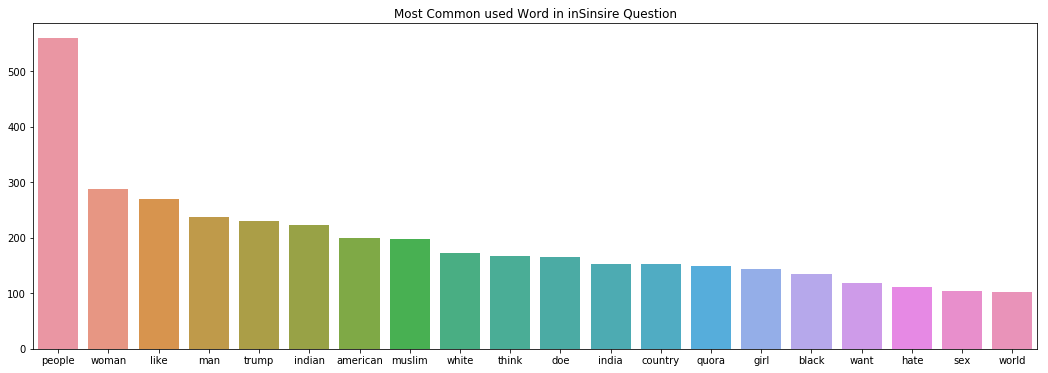

In [16]:
IncesireQuest = [quest for quest in train[train.target==1]["question_text"] ]
IncesireQuest = spacy_tokenizer(" ".join(IncesireQuest))

incensire_counter = Counter(IncesireQuest)

incesire_Word = [word[0] for word in incensire_counter.most_common(20)]
incesire_number = [word[1] for word in incensire_counter.most_common(20)]


fig = plt.figure(figsize=(18,6))
snb.barplot(x=incesire_Word,y=incesire_number)
plt.title("Most Common used Word in inSinsire Question")
plt.show()

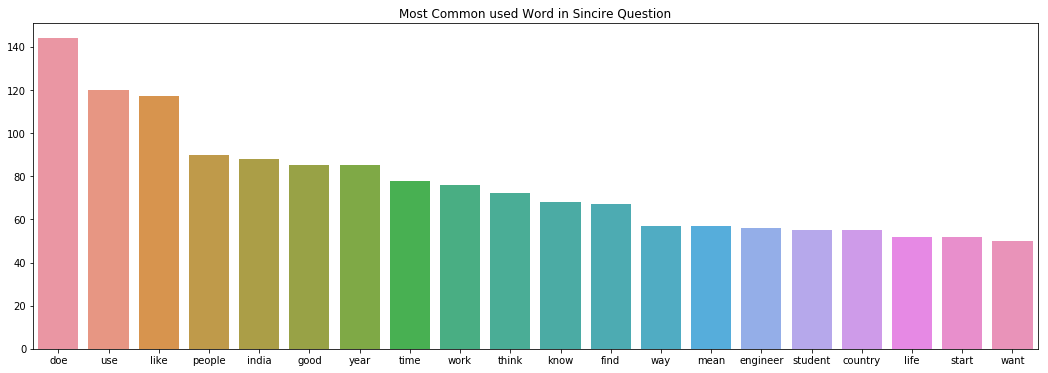

In [17]:
sincereQuest = [quest for quest in train[train.target==0]["question_text"] ]
sincereQuest = spacy_tokenizer(" ".join(sincereQuest))
sincere_counter = Counter(sincereQuest)

sincere_Word = [word[0] for word in sincere_counter.most_common(20)]
sincere_number = [word[1] for word in sincere_counter.most_common(20)]

fig = plt.figure(figsize=(18,6))
snb.barplot(x=sincere_Word,y=sincere_number)
plt.title("Most Common used Word in Sincire Question")
plt.show()

In [18]:
#!pip install --upgrade "ibm-watson>=3.0.3"

In [19]:
from ibm_watson import ToneAnalyzerV3
import json
tone_analyzer = ToneAnalyzerV3(
    version='2017-09-21',
    iam_apikey='clZmOMxvCfTb-fR_XntNaDsHKFwMv3LHz4cxmrGCLZV-',
    url='https://gateway-fra.watsonplatform.net/tone-analyzer/api'
)

# function to analyse each question
def get_ton(text):
    ton_result = "undefined"
    ton_analysis = tone_analyzer.tone(tone_input=text,content_type="text/plain").get_result()
    score = 0
    for t in ton_analysis['document_tone']['tones']:
        # taking the ton with the best score
        if(t['score'] > score):
            ton_result = str(t['tone_name'])
    return ton_result


In [16]:
X_ton1 = [get_ton(x) for x in train.iloc[:1000,:]["question_text"]]
X_ton1

ApiException: Error: Unauthorized: Access is denied due to invalid credentials, Code: 401 , X-global-transaction-id: 683fc2df5d1828986c384171

In [17]:
X_ton2 = [get_ton(x) for x in train.iloc[1000:,:]["question_text"]]
X_ton2

ApiException: Error: Unauthorized: Access is denied due to invalid credentials, Code: 401 , X-global-transaction-id: 0e7fa6da5d18289914fc356b

In [32]:
X_ton = [X_ton1,X_ton2]
X_ton = np.concatenate(X_ton)
X_ton.shape

(6464,)

In [167]:
X_ton = pd.DataFrame(X_ton,columns=["ton"])
train.insert(2,"ton",X_ton['ton'].values)
train

,qid,question_text,ton,target
898982,b0233a4229cbe43a4b93,Why does ethnicity cleansing and genocide seem...,Tentative,1
729370,8ed08bb6de33460701f8,How can I meet people into beastiality?,undefined,1
522956,6661454092af7061077e,Can Queen Elizabeth II be tried for treason si...,Tentative,1
826581,a1fdd37683285a918a4e,Is Singapore really the worst dictatorship in ...,Analytical,1
325399,3fc5e1d9ca679be4737e,Can black people get cancer?,Sadness,1
973029,be9ec9af26d71c60290e,How did Bowie manage to collaborate over his l...,Joy,0
1045986,ccf7d8177b7b9121f6fe,Why do my balls sting after I wake up in the m...,Fear,0
1056624,cf0a1f89ec527626b245,Euron Greyjoy wants to see the world burn. Doe...,Analytical,0
738313,90992d71ea1f1fa2b4b4,When will the evangelicals stop pretending the...,Analytical,1
432738,54d08fcab8a44b9d8fae,Why do people point out that I'm depressed all...,Confident,0


In [169]:
train.to_csv("train_s.csv",index=False)

In [34]:
X_test_ton = [get_ton(x) for x in test["question_text"]]

In [36]:
X_test_ton

['Analytical',
 'Tentative',
 'Tentative',
 'Analytical',
 'undefined',
 'undefined',
 'Tentative',
 'Tentative',
 'undefined',
 'Joy',
 'Confident',
 'undefined',
 'Tentative',
 'undefined',
 'Analytical',
 'Tentative',
 'undefined',
 'Tentative',
 'Analytical',
 'Tentative',
 'Confident',
 'undefined',
 'Tentative',
 'Joy',
 'undefined',
 'Tentative',
 'Joy',
 'undefined',
 'Analytical',
 'Analytical',
 'undefined',
 'Analytical',
 'undefined',
 'undefined',
 'Analytical',
 'undefined',
 'Analytical',
 'Tentative',
 'Confident',
 'undefined',
 'Analytical',
 'Analytical',
 'Tentative',
 'Tentative',
 'undefined',
 'Confident',
 'undefined',
 'Analytical',
 'Confident',
 'Tentative',
 'Joy',
 'Tentative',
 'undefined',
 'Sadness',
 'undefined',
 'Confident',
 'Tentative',
 'undefined',
 'undefined',
 'Joy',
 'Analytical',
 'Joy',
 'undefined',
 'Analytical',
 'Tentative',
 'undefined',
 'undefined',
 'undefined',
 'Analytical',
 'undefined',
 'Analytical',
 'Analytical',
 'Analytical'

In [116]:
t = pd.DataFrame([str(x) for x in X_test_ton],columns=["ton"])
t

,ton_name
0,Analytical
1,Tentative
2,Tentative
3,Analytical
4,undefined
5,undefined
6,Tentative
7,Tentative
8,undefined
9,Joy


In [161]:
p = pd.read_csv("ton.csv")
test["ton"]=p["ton_name"].values
test

,qid,question_text,ton,target
193770,25e2d687b72e9fc3f6eb,Why do people complain about women being raped...,Analytical,1
120477,1795b1019206619c55d7,"As a foreigner living in Egypt, what did you f...",Tentative,0
1047802,cd512d2554f7e6deef88,How does playing FIFA while being stoned feel?,Tentative,1
113287,162998c0b8cb0882cd3e,How gorkhaland issue can be resolved now as ar...,Analytical,0
369454,48712960ded9bada4000,Do all US movies involves in certain kissing o...,undefined,1
214979,2a0c9a40beae8acb9c3f,What is the usage of maxima and minima in trig...,undefined,0
1111032,d9b4b8d2ca00ad3f245c,"Who treats their families better and humbler, ...",Tentative,1
406399,4fa1e8e09e6b52e16f82,Do people realize that no one cares if even di...,Tentative,1
815714,9fd6c5f508685a468466,How much should I score to get a rank about 15...,undefined,0
38951,079ef9f077d3a53d4b96,Can you create a story about a time traveling ...,Joy,0


In [170]:
test.to_csv("test_s.csv",index=False)

In [164]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1617 entries, 193770 to 1086616
Data columns (total 4 columns):
qid              1617 non-null object
question_text    1617 non-null object
ton              1617 non-null object
target           1617 non-null int64
dtypes: int64(1), object(3)
memory usage: 143.2+ KB


In [140]:
t.to_csv("ton.csv",index=False)

In [20]:
#reload data
train = pd.read_csv("train_s.csv")
test = pd.read_csv("test_s.csv")

In [21]:
X_train = train['question_text']
Y_train = train["target"]

X_test = test['question_text']
y_test = test['target']

In [22]:
X_test

0       Why do people complain about women being raped...
1       As a foreigner living in Egypt, what did you f...
2          How does playing FIFA while being stoned feel?
3       How gorkhaland issue can be resolved now as ar...
4       Do all US movies involves in certain kissing o...
5       What is the usage of maxima and minima in trig...
6       Who treats their families better and humbler, ...
7       Do people realize that no one cares if even di...
8       How much should I score to get a rank about 15...
9       Can you create a story about a time traveling ...
10      Why did Vanessa Lee Chester decide to become a...
11      Do women like guys who shave their pubic hair ...
12      What are some of the 'Homestay' services to pa...
13      How can I get settled in Australia while study...
14      Where can you go to learn piano tuning and reg...
15      Why do right-wing British nationalists tend to...
16             What are the places to visit in Jaisalmer?
17            

In [23]:
mergeddata = [train,test]
mergeddata = pd.concat(mergeddata)

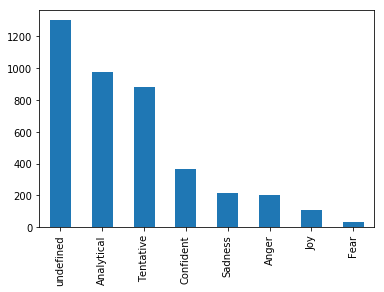

In [24]:
mergeddata[mergeddata['target']==1]['ton'].value_counts().plot(kind='bar')

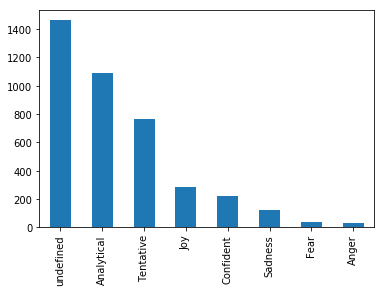

In [25]:
mergeddata[mergeddata['target']==0]['ton'].value_counts().plot(kind='bar')

# Building the first Model

### a) training model without the Ton analyser

In [26]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver="liblinear")

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([("vectorizer",LemmaVetor),("classifier",classifier)])

param_grid = {'vectorizer__ngram_range':[(1,1),(1,2),(1,3)],
              "classifier__C":[0.001,0.01,10,100,1000]
             }
grid = GridSearchCV(pipe,param_grid=param_grid,cv=5)

In [33]:
grid.fit(X_train,Y_train)
print("Best cross-vaidation accuracy : {:.2f}".format(grid.best_score_))
print("Best Parameter : {}".format(grid.best_params_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))

Best cross-vaidation accuracy : 0.83
Best Parameter : {'classifier__C': 10, 'vectorizer__ngram_range': (1, 3)}
Test set score: 0.84


## Working with the Best Model

#### Logistic regression with C=10 and a Tokenizer function with n_gram = (1,3)

In [36]:
!pip install mglearn

  Stored in directory: C:\Users\Arnold\AppData\Local\pip\Cache\wheels\74\cf\8d\04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


Text(0.5, 1.0, 'Most important Feature for Prediction')

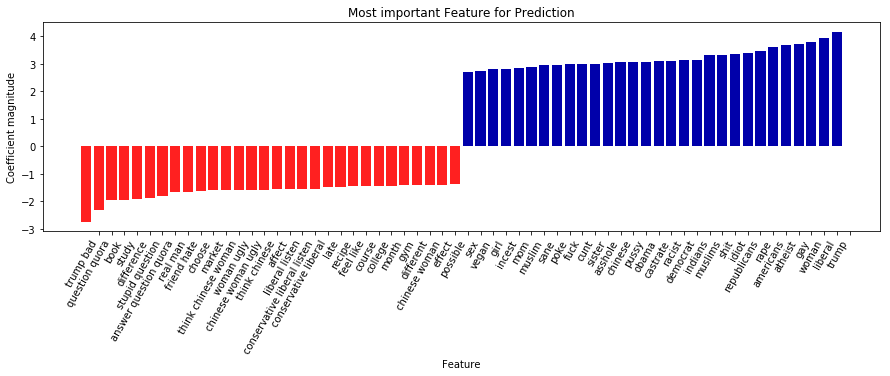

In [47]:
import mglearn
vectorizer = grid.best_estimator_.named_steps["vectorizer"]
feature_name = np.array(vectorizer.get_feature_names())
coefeicient  = grid.best_estimator_.named_steps["classifier"].coef_
#mask = np.array([len(feature.split(" ")) for feature in feature_name]) 
mglearn.tools.visualize_coefficients(coefeicient,feature_name,n_top_features=30)
plt.title("Most important Feature for Prediction")

## Classification Metric

In [56]:
from sklearn.metrics import confusion_matrix
logisreg = grid.best_estimator_
y_pred = logisreg.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[704  76]
 [176 661]]


In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,
target_names=["Sincere", "Insincere"]))

              precision    recall  f1-score   support

     Sincere       0.80      0.90      0.85       780
   Insincere       0.90      0.79      0.84       837

   micro avg       0.84      0.84      0.84      1617
   macro avg       0.85      0.85      0.84      1617
weighted avg       0.85      0.84      0.84      1617



In [58]:
y_test.value_counts()

1    837
0    780
Name: target, dtype: int64

### Working with TF-IDF (Term Frequency-Inverse Document Frequency)

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeWtfidf = Pipeline([("vectorizer",tfidf_vector),("classifier",classifier)])

param_grid = {'vectorizer__ngram_range':[(1,1),(1,2),(1,3)],
              "classifier__C":[0.001,0.01,10,100,1000]
             }
gridT = GridSearchCV(pipeWtfidf,param_grid=param_grid,cv=5)

In [39]:
gridT.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=...ty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)], 'classifier__C': [0.001, 0.01, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [40]:
print("Best cross-vaidation accuracy : {:.2f}".format(gridT.best_score_))
print("Best Parameter : {}".format(gridT.best_params_))
print("Test set score: {:.2f}".format(gridT.score(X_test, y_test)))

Best cross-vaidation accuracy : 0.80
Best Parameter : {'classifier__C': 10, 'vectorizer__ngram_range': (1, 2)}
Test set score: 0.85


## b) With the Ton Anlyser

In [41]:
from sklearn.base import TransformerMixin

In [42]:
Tondictionary = {'undefined':0,'Anger':1,'Fear':2,'Joy':3, 'Sadness':4, 'Analytical':5,'Confident':6, 'Tentative':7 }

In [43]:
def get_quesTon(text):
    ton = mergeddata[mergeddata['question_text']==text]["ton"].values
    return ton[0]
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

In [44]:
# Custom transformer using spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return np.array(pd.Series([get_quesTon(text) for text in X]).map(Tondictionary)).reshape(-1,1)

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

In [45]:
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer

Pipe_with_ton = Pipeline([
    ("feature",FeatureUnion([
        ("vectorizer",LemmaVetor),
        ("tonanalyse",predictors())
    ])),
    ("classifier",classifier)
])
     
param_grid = {'feature__vectorizer__ngram_range':[(1,1),(1,2),(1,3)],
              "classifier__C":[0.001,0.01,10,100,1000]}
grid_withTon = GridSearchCV(Pipe_with_ton,param_grid=param_grid,cv=5)

In [46]:
grid_withTon.fit(X_train,Y_train)
print("Best cross-vaidation accuracy : {:.2f}".format(grid_withTon.best_score_))
print("Best Parameter : {}".format(grid_withTon.best_params_))
print("Test set score: {:.2f}".format(grid_withTon.score(X_test, y_test)))

Best cross-vaidation accuracy : 0.81
Best Parameter : {'classifier__C': 100, 'feature__vectorizer__ngram_range': (1, 2)}
Test set score: 0.84


## Neural Network

In [55]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', random_state=0)

pipe_neural = Pipeline([
    ("vectorizer",LemmaVetor),
    ("classifier",mlp)
])
     
param_grid = {'vectorizer__ngram_range':[(1,1),(1,2),(1,3)],
              "classifier__hidden_layer_sizes":[[10,10],[100,100]],
              "classifier__activation":["tanh","relu"],
              "classifier__alpha":[0.001,0.01,1,10,100,1000]}
grid_neural = GridSearchCV(pipe_neural,param_grid=param_grid,cv=5)

In [56]:
grid_neural.fit(X_train,Y_train)
print("Best cross-vaidation accuracy : {:.2f}".format(grid_neural.best_score_))
print("Best Parameter : {}".format(grid_neural.best_params_))
print("Test set score: {:.2f}".format(grid_neural.score(X_test, y_test)))

Best cross-vaidation accuracy : 0.81
Best Parameter : {'classifier__activation': 'relu', 'classifier__alpha': 10, 'classifier__hidden_layer_sizes': [100, 100], 'vectorizer__ngram_range': (1, 2)}
Test set score: 0.84


### SVM

In [29]:
from sklearn.svm import SVC 
classifierSVM = SVC()

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([("vectorizer",LemmaVetor),("classifier",classifierSVM)])

param_grid = {'vectorizer__ngram_range':[(1,1),(1,2),(1,3)],
              "classifier__C":[0.001,0.01,10,100,1000],
              "classifier__gamma":[0.0001,0.001,0.01,0.1,1,10,100]
             }
grid = GridSearchCV(pipe,param_grid=param_grid,cv=5)
grid.fit(X_train,Y_train)
print("Best cross-vaidation accuracy : {:.2f}".format(grid.best_score_))
print("Best Parameter : {}".format(grid.best_params_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))


Best cross-vaidation accuracy : 0.83
Best Parameter : {'classifier__C': 10, 'classifier__gamma': 0.1, 'vectorizer__ngram_range': (1, 1)}
Test set score: 0.83
